In [29]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import config  # import your config.py file

scope = "user-library-read playlist-read-private user-read-email"

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=config.CLIENT_ID,
                                               client_secret=config.CLIENT_SECRET,
                                               redirect_uri=config.REDIRECT_URI,
                                               scope=scope))

user = sp.current_user()
print(f"Logged in as: {user['display_name']} ({user['email']})")

Logged in as: SouthXYZ (forsinainx@gmail.com)


In [8]:
top_tracks = sp.current_user_top_tracks(limit=50, time_range='medium_term')

print("Found top 50 tracks:")


for idx, item in enumerate(top_tracks['items'], start=1):
    track_name = item['name']
    artists = ', '.join([artist['name'] for artist in item['artists']])
    print(f"{idx}. {track_name} by {artists}")

Found top 50 tracks:
1. Bad Habits (feat. Bring Me The Horizon) by Ed Sheeran, Bring Me The Horizon
2. Blood Like Gasoline by Against The Current
3. Baller by Abor & Tynna
4. Worst Kept Secret by Subwoolfer
5. Hallucination by Sissal
6. Laika Party by EMMY
7. Sympathy is a knife by Charli xcx
8. cliché by mgk
9. Slavic Queen by Filip Lackovic
10. LIGHTS by HARDSTYLE CVNT
11. Lighter by Kyle Alessandro
12. Sunrise by More Plastic, Halvorsen
13. Black Magic by Jonasu
14. SOLANA by Alex LeMirage
15. Teeth by 5 Seconds of Summer
16. I Like You Best by Ella Red
17. After Dark by Mr.Kitty
18. fury by STIM, RJ Pasin
19. Bloody Mary - Instrumental Slowed by ceZk
20. Change My Heart by Ummet Ozcan, Laurell
21. Can We Be Friends by Ooyy
22. Don't Lose Your Heart by Dream on Dreamer, Jarrad Salton
23. EGO by Qing Madi, VALORANT
24. King Of My Castle by Naeleck, Agent Zed
25. Blazing Heart - English Version by HOYO-MiX, Chrissy Costanza
26. Heroes by Måns Zelmerlöw
27. Caught It (with Chrissy Cost

In [9]:
import pandas as pd

items = top_tracks['items']

track_data = []

for track in items:
    track_info = {
        'track_name': track['name'],
        'artist_names': ', '.join([artist['name'] for artist in track['artists']]),
        'album_name': track['album']['name'],
        'popularity': track['popularity'],
        'duration_ms': track['duration_ms'],
        'release_date': track['album']['release_date'],
        'track_id': track['id']
    }
    track_data.append(track_info)

df_tracks = pd.DataFrame(track_data)

df_tracks['duration_sec'] = df_tracks['duration_ms'] / 1000

df_tracks.head()

,track_name,artist_names,album_name,popularity,duration_ms,release_date,track_id,duration_sec
0,Bad Habits (feat. Bring Me The Horizon),"Ed Sheeran, Bring Me The Horizon",= (Tour Edition),43,250763,2020,2tsM4FRW70JW2xtGc3oZqZ,250.763
1,Blood Like Gasoline,Against The Current,In Our Bones,40,198000,2016-05-20,4hsCkeF9RUxJzv78Oe2unc,198.000
2,Baller,Abor & Tynna,Bittersüß,81,159493,2025-02-14,4kbkYbhWNiSJraySknB4hD,159.493
3,Worst Kept Secret,Subwoolfer,Worst Kept Secret,34,161253,2023-02-04,405Zy4AndqlaewcRzyKRtP,161.253
4,Hallucination,Sissal,Hallucination,43,183253,2025-05-23,3RYraCZjOLm1jXudyvtPVe,183.253


In [10]:
df_tracks

,track_name,artist_names,album_name,popularity,duration_ms,release_date,track_id,duration_sec
0,Bad Habits (feat. Bring Me The Horizon),"Ed Sheeran, Bring Me The Horizon",= (Tour Edition),43,250763,2020,2tsM4FRW70JW2xtGc3oZqZ,250.763
1,Blood Like Gasoline,Against The Current,In Our Bones,40,198000,2016-05-20,4hsCkeF9RUxJzv78Oe2unc,198.000
2,Baller,Abor & Tynna,Bittersüß,81,159493,2025-02-14,4kbkYbhWNiSJraySknB4hD,159.493
3,Worst Kept Secret,Subwoolfer,Worst Kept Secret,34,161253,2023-02-04,405Zy4AndqlaewcRzyKRtP,161.253
4,Hallucination,Sissal,Hallucination,43,183253,2025-05-23,3RYraCZjOLm1jXudyvtPVe,183.253
5,Laika Party,EMMY,Laika Party,69,180068,2025-01-20,5PZnJ8GErvuiCo7wKKtpKo,180.068
6,Sympathy is a knife,Charli xcx,BRAT,74,151125,2024-06-07,5c9tBmJKbTdn1vhzXHeAwW,151.125
7,cliché,mgk,cliché,86,176242,2025-05-23,3aD33slymVwdEcdbKUBnDu,176.242
8,Slavic Queen,Filip Lackovic,Slavicum,48,141333,2024-06-07,5K2R8zMXMhCtQeX3Rwjgnb,141.333
9,LIGHTS,HARDSTYLE CVNT,LIGHTS,65,126909,2022-10-08,10ubMWpjt26hA9oCqIMnqx,126.909


In [11]:
import pandas as pd

items = top_tracks['items']

track_data_names = []

for track in items:
    track_info = {
        'track_name': track['name'],
        'artist_names': ', '.join([artist['name'] for artist in track['artists']]),
        'album_name': track['album']['name'],
    }
    track_data_names.append(track_info)

df_tracksNames = pd.DataFrame(track_data_names)

df_tracksNames

,track_name,artist_names,album_name
0,Bad Habits (feat. Bring Me The Horizon),"Ed Sheeran, Bring Me The Horizon",= (Tour Edition)
1,Blood Like Gasoline,Against The Current,In Our Bones
2,Baller,Abor & Tynna,Bittersüß
3,Worst Kept Secret,Subwoolfer,Worst Kept Secret
4,Hallucination,Sissal,Hallucination
5,Laika Party,EMMY,Laika Party
6,Sympathy is a knife,Charli xcx,BRAT
7,cliché,mgk,cliché
8,Slavic Queen,Filip Lackovic,Slavicum
9,LIGHTS,HARDSTYLE CVNT,LIGHTS


In [12]:
%whos

Variable           Type         Data/Info
-----------------------------------------
CLIENT_ID          str          6f44ce349d904e5bb1f7dcdf7acaa085
CLIENT_SECRET      str          14f140d26b53443ea5b28be2b12445d1
REDIRECT_URI       str          http://127.0.0.1:8090/callback
SpotifyOAuth       type         <class 'spotipy.oauth2.SpotifyOAuth'>
artists            str          League of Legends, Against The Current
df_tracks          DataFrame    Shape: (50, 8)
df_tracksNames     DataFrame    Shape: (50, 3)
idx                int          50
item               dict         n=18
items              list         n=50
pd                 module       <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
scope              str          user-top-read
sp                 Spotify      <spotipy.client.Spotify o<...>ct at 0x0000023B293A50F0>
spotipy            module       <module 'spotipy' from 'C<...>s\\spotipy\\__init__.py'>
top_tracks         dict         n=7
track              dict         n

In [13]:
df_tracksNames.head()

,track_name,artist_names,album_name
0,Bad Habits (feat. Bring Me The Horizon),"Ed Sheeran, Bring Me The Horizon",= (Tour Edition)
1,Blood Like Gasoline,Against The Current,In Our Bones
2,Baller,Abor & Tynna,Bittersüß
3,Worst Kept Secret,Subwoolfer,Worst Kept Secret
4,Hallucination,Sissal,Hallucination


In [15]:
import pandas as pd

items = top_tracks['items']

track_data = []

for track in items:
    track_info = {
        'track_name': track['name'],
        'artist_names': ', '.join([artist['name'] for artist in track['artists']]),
        'album_name': track['album']['name'],
        'popularity': track['popularity'],
        'duration_ms': track['duration_ms'],
        'release_date': track['album']['release_date'],
        'track_id': track['id']
    }
    track_data.append(track_info)

df_tracks = pd.DataFrame(track_data)

df_tracks['duration_sec'] = df_tracks['duration_ms'] / 1000

df_tracks.head()

,track_name,artist_names,album_name,popularity,duration_ms,release_date,track_id,duration_sec
0,Bad Habits (feat. Bring Me The Horizon),"Ed Sheeran, Bring Me The Horizon",= (Tour Edition),43,250763,2020,2tsM4FRW70JW2xtGc3oZqZ,250.763
1,Blood Like Gasoline,Against The Current,In Our Bones,40,198000,2016-05-20,4hsCkeF9RUxJzv78Oe2unc,198.000
2,Baller,Abor & Tynna,Bittersüß,81,159493,2025-02-14,4kbkYbhWNiSJraySknB4hD,159.493
3,Worst Kept Secret,Subwoolfer,Worst Kept Secret,34,161253,2023-02-04,405Zy4AndqlaewcRzyKRtP,161.253
4,Hallucination,Sissal,Hallucination,43,183253,2025-05-23,3RYraCZjOLm1jXudyvtPVe,183.253


In [22]:
artist_ids = []

for track in top_tracks['items']:
    for artist in track['artists']:
        artist_ids.append(artist['id'])

unique_artist_ids = list(set(artist_ids))

print(f"Found {len(unique_artist_ids)} unique artists")

Found 70 unique artists


In [23]:
def fetch_artists_genres(artist_ids):
    all_artists = []
    for i in range(0, len(artist_ids), 50):
        batch = artist_ids[i:i+50]
        response = sp.artists(batch)
        all_artists.extend(response['artists'])
    return all_artists

artists_info = fetch_artists_genres(unique_artist_ids)

In [25]:
import pandas as pd

artist_data = []

for artist in artists_info:
    artist_data.append({
        'artist_name': artist['name'],
        'genres': artist['genres']
    })

df_artists = pd.DataFrame(artist_data)

df_artists.head()

,artist_name,genres
0,REI AMI,[]
1,Go_A,[]
2,Toaka,[j-pop]
3,Abor & Tynna,[]
4,John Powell,[soundtrack]


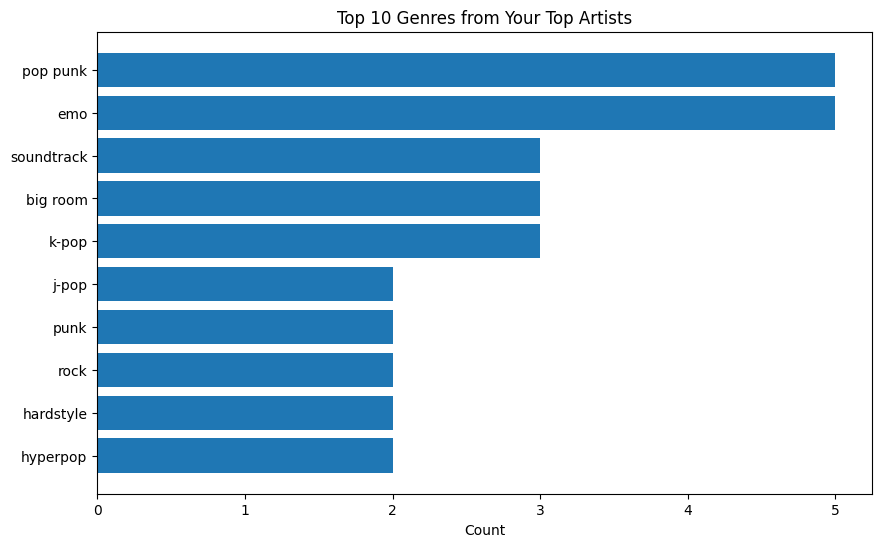

In [26]:
from collections import Counter
import matplotlib.pyplot as plt

all_genres = [genre for sublist in df_artists['genres'] for genre in sublist]

genre_counts = Counter(all_genres)

top_genres = genre_counts.most_common(10)

genres, counts = zip(*top_genres)

plt.figure(figsize=(10,6))
plt.barh(genres, counts)
plt.gca().invert_yaxis()
plt.title('Top 10 Genres from Your Top Artists')
plt.xlabel('Count')
plt.show()

In [30]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import config  # import your config.py file

scope = "user-library-read playlist-read-private user-read-email"

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=config.CLIENT_ID,
                                               client_secret=config.CLIENT_SECRET,
                                               redirect_uri=config.REDIRECT_URI,
                                               scope=scope))

user = sp.current_user()
print(f"Logged in as: {user['display_name']} ({user['email']})")

Logged in as: SouthXYZ (forsinainx@gmail.com)


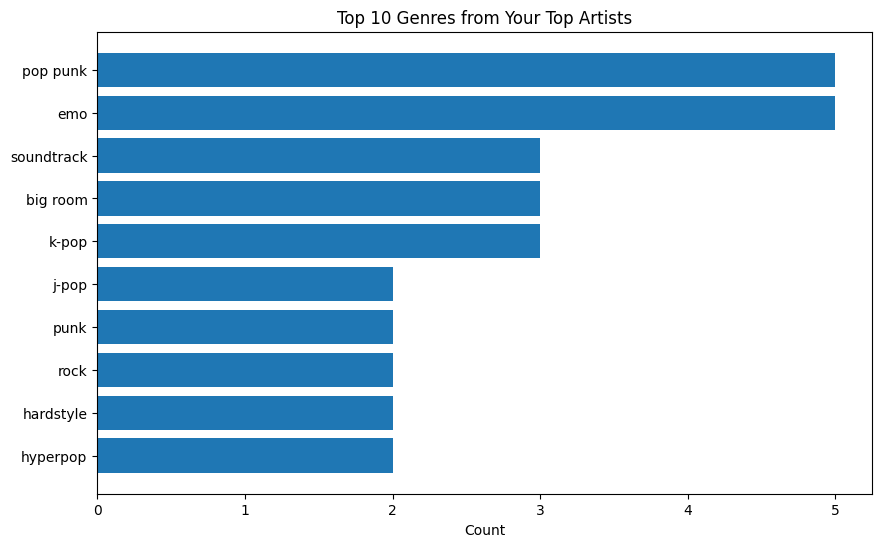

In [31]:
from collections import Counter
import matplotlib.pyplot as plt

all_genres = [genre for sublist in df_artists['genres'] for genre in sublist]

genre_counts = Counter(all_genres)

top_genres = genre_counts.most_common(10)

genres, counts = zip(*top_genres)

plt.figure(figsize=(10,6))
plt.barh(genres, counts)
plt.gca().invert_yaxis()
plt.title('Top 10 Genres from Your Top Artists')
plt.xlabel('Count')
plt.show()